In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data
data=pd.read_csv("/content/matches.csv")

In [3]:
#first five rows of the dataset
data.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


#Exploratory Data Analysis




In [4]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
#from the above dataset we require only 6 columns

In [6]:
#remove all the unrequired columns
remove=["id","date","result","dl_applied","city","win_by_runs","win_by_wickets","player_of_match","umpire1","umpire2","umpire3"]
data.drop(labels=remove,inplace=True,axis="columns")

In [7]:
data.head()

,season,team1,team2,toss_winner,toss_decision,winner,venue
0,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal"
1,2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant,Maharashtra Cricket Association Stadium
2,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,Saurashtra Cricket Association Stadium
3,2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,Holkar Cricket Stadium
4,2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,M Chinnaswamy Stadium


In [8]:
data.shape

(756, 7)

In [9]:
data['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   season         756 non-null    int64 
 1   team1          756 non-null    object
 2   team2          756 non-null    object
 3   toss_winner    756 non-null    object
 4   toss_decision  756 non-null    object
 5   winner         752 non-null    object
 6   venue          756 non-null    object
dtypes: int64(1), object(6)
memory usage: 41.5+ KB


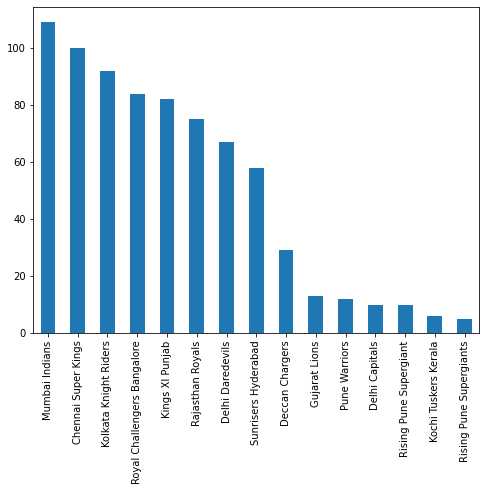

In [11]:
plt.figure(figsize=(8,6))
data.winner.value_counts().plot(kind="bar")

In [12]:
data.toss_decision.unique()

array(['field', 'bat'], dtype=object)

In [13]:
data.toss_decision=data.toss_decision.map({"field":1,"bat":2})

In [14]:
data.head()

,season,team1,team2,toss_winner,toss_decision,winner,venue
0,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,1,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal"
1,2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,1,Rising Pune Supergiant,Maharashtra Cricket Association Stadium
2,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,1,Kolkata Knight Riders,Saurashtra Cricket Association Stadium
3,2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,1,Kings XI Punjab,Holkar Cricket Stadium
4,2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,2,Royal Challengers Bangalore,M Chinnaswamy Stadium


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le=LabelEncoder()

In [17]:
data.venue=le.fit_transform(data.venue)

In [18]:
data.head()

,season,team1,team2,toss_winner,toss_decision,winner,venue
0,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,1,Sunrisers Hyderabad,28
1,2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,1,Rising Pune Supergiant,21
2,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,1,Kolkata Knight Riders,31
3,2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,1,Kings XI Punjab,13
4,2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,2,Royal Challengers Bangalore,17


In [19]:
data[data['winner'].isnull()]

,season,team1,team2,toss_winner,toss_decision,winner,venue
300,2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,2,NaN,9
545,2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,1,NaN,17
570,2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,1,NaN,17
744,2019,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,1,NaN,19


In [20]:
data.drop(['season'],inplace=True,axis="columns")

In [21]:
data.head()

,team1,team2,toss_winner,toss_decision,winner,venue
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,1,Sunrisers Hyderabad,28
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,1,Rising Pune Supergiant,21
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,1,Kolkata Knight Riders,31
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,1,Kings XI Punjab,13
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,2,Royal Challengers Bangalore,17


In [23]:
data.dropna(inplace=True)

In [24]:
data.isnull().sum()

team1            0
team2            0
toss_winner      0
toss_decision    0
winner           0
venue            0
dtype: int64

In [25]:
data.columns

Index(['team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'venue'], dtype='object')

In [26]:
data.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [33]:
 team_names={
    'Sunrisers Hyderabad':3,
    'Mumbai Indians' :4,
    'Gujarat Lions':5,
    'Rising Pune Supergiant':6, 
    'Royal Challengers Bangalore':2,
    'Kolkata Knight Riders':7,
    'Delhi Daredevils':8, 
    'Kings XI Punjab':9,
    'Chennai Super Kings':1,
    'Rajasthan Royals':10,
    'Deccan Chargers':11,
    'Kochi Tuskers Kerala':12, 
    'Pune Warriors':13,
    'Rising Pune Supergiants':6,
    'Delhi Capitals':14
}

In [ ]:
#apply to the respective columns

In [35]:
apply={
    'team1':team_names,
    'team2':team_names,
    'toss_winner':team_names,
     'winner':team_names
}

In [36]:
data.replace(apply,inplace=True)

In [37]:
data.head()

,team1,team2,toss_winner,toss_decision,winner,venue
0,3,2,2,1,3,28
1,4,6,6,1,6,21
2,5,7,7,1,7,31
3,6,9,9,1,9,13
4,2,8,2,2,2,17


In [ ]:
#from the above the winner is the dependent column

In [38]:
x=data.drop(["winner"],axis="columns")
y=data.iloc[:,-2]

In [40]:
y.head()

0    3
1    6
2    7
3    9
4    2
Name: winner, dtype: int64

In [ ]:
#split the data into test and train

In [41]:
from sklearn.model_selection import train_test_split,cross_val_score

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
scores=cross_val_score(clf,x_train,y_train,cv=3,scoring="accuracy")
print("Accuracy:"+str(scores.mean()))

Accuracy:0.5224212271973466


In [52]:
y_Pred=clf.predict(x_test)

In [53]:
y_Pred

array([ 3,  1,  9, 10,  2,  4, 10,  4,  3, 10,  4,  8,  1,  1,  8,  8,  9,
        7,  7,  4,  2,  4,  4,  8, 10,  3,  1,  7,  3,  3,  9,  4,  8,  4,
        4,  4,  4,  3,  2,  9,  4, 10,  8,  2,  1,  7,  9,  1,  1,  3,  9,
        4,  1,  7, 10,  4,  2,  9,  1, 11,  2,  7, 10,  8,  9,  1,  9,  9,
        9,  1, 10,  8,  2,  1,  4,  3,  4,  8,  3,  2,  1,  9, 11,  3, 10,
        2,  3,  1,  9,  4,  8, 11,  7,  3, 10,  9,  7,  8,  3,  1,  9,  5,
        3, 10,  8,  4,  7,  7,  8,  2,  2,  7,  1,  4,  8,  3,  4,  2,  6,
       14,  1, 10, 10, 11,  7,  3,  3,  4,  1,  8,  1,  1,  2,  1,  1,  4,
        9,  3, 10,  3,  6,  9,  2,  2, 10, 11,  3,  4, 13, 10,  2])

In [48]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(y_test,y_Pred)

0.4304635761589404

In [58]:
y_test

543     3
379     1
76      9
731    10
69     10
       ..
725    14
636     1
698    14
245     7
573     2
Name: winner, Length: 151, dtype: int64